In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
aus_men    = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/AusOpen-men-2013.csv")
aus_women  = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/AusOpen-women-2013.csv")
french_men = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/FrenchOpen-men-2013.csv")
french_women=pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/FrenchOpen-women-2013.csv")
us_men     = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/USOpen-men-2013.csv")
us_women   = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/USOpen-women-2013.csv")
wimb_men   = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/Wimbledon-men-2013.csv")
wimb_women = pd.read_csv("D:/semester_2/ES114/DATA_Narrative3/Tennis-Major-Tournaments-Match-Statistics/Wimbledon-women-2013.csv")

A.	How does the First Serve Points affects the results of the Game?

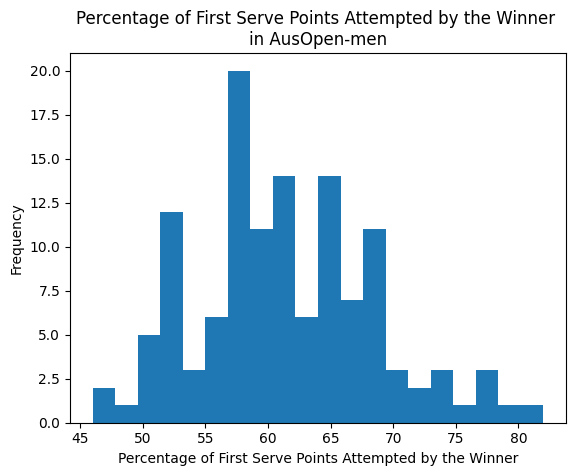

In [3]:


aus_men["FSP_winner_percent"] = aus_men["FSP.1"]

plt.hist(aus_men["FSP_winner_percent"], bins=20)
plt.title("""Percentage of First Serve Points Attempted by the Winner 
in AusOpen-men""")
plt.xlabel("Percentage of First Serve Points Attempted by the Winner")
plt.ylabel("Frequency")
plt.show()


C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\4054779591.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aus_men["FSP.1"],color="red", shade=True)


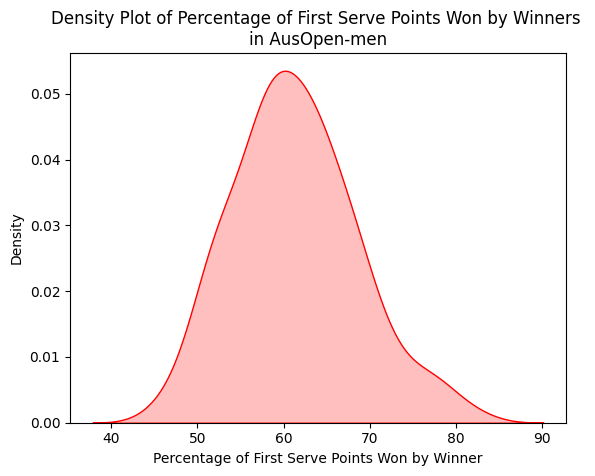

In [4]:
import pandas as pd
import seaborn as sns

sns.kdeplot(aus_men["FSP.1"],color="red", shade=True)
plt.title("""Density Plot of Percentage of First Serve Points Won by Winners 
in AusOpen-men""")
plt.xlabel("Percentage of First Serve Points Won by Winner")
plt.show()


B.	What is the relation between the Aces served by Winners and Runners-up?

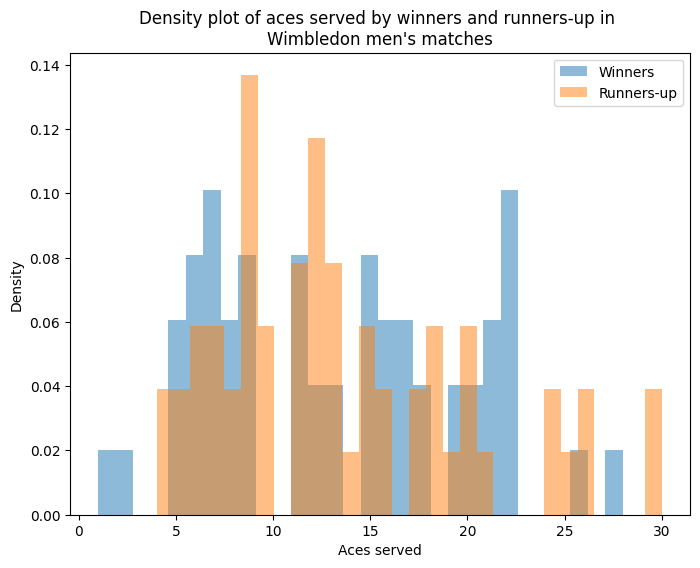

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

wimbledon_men=wimb_men
winners = wimbledon_men[wimbledon_men["Result"] == 1]
runners_up = wimbledon_men[wimbledon_men["Result"] == 0]

plt.figure(figsize=(8, 6))
plt.title("""Density plot of aces served by winners and runners-up in 
Wimbledon men's matches""")
plt.xlabel("Aces served")
plt.ylabel("Density")
plt.hist(winners["ACE.1"], bins=30, density=True, alpha=0.5, label="Winners")
plt.hist(runners_up["ACE.2"], bins=30, density=True, alpha=0.5, label="Runners-up")
plt.legend()
plt.show()


C.	Coorelation between the winning of match vs more first point wins-


C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\3821125396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_by_fsw1 = us_men.groupby(pd.cut(us_men['FSW.1'], bins=10)).mean()['Result']


<AxesSubplot: title={'center': 'Relationship Between First Serve Wins and Number of Matches Won (US Men)'}, xlabel='FSW.1', ylabel='Average Number of Matches Won'>

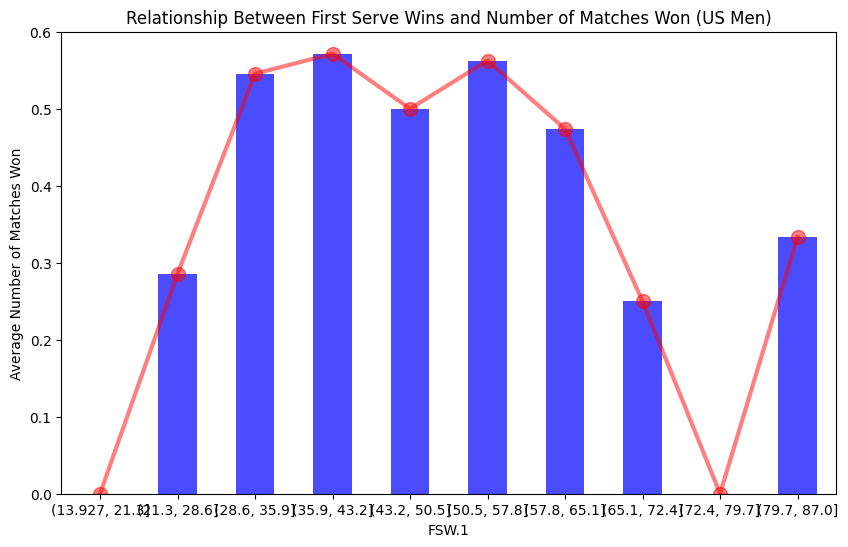

In [11]:
result_by_fsw1 = us_men.groupby(pd.cut(us_men['FSW.1'], bins=10)).mean()['Result']

# Create a bar plot
result_by_fsw1.plot(kind='bar', color='blue', alpha=0.7, figsize=(10,6))
plt.xlabel('Percentage of First Serve Wins (Player 1)')
plt.ylabel('Average Number of Matches Won')
plt.title('Relationship Between First Serve Wins and Number of Matches Won (US Men)')
# plt.show()
result_by_fsw1.plot(color='red',linewidth=3,marker='o',linestyle='-',markersize=10,alpha=0.5)


In [10]:
filtered_data = us_men[us_men['FSW.1'] > us_men['FSW.2']]

prob_win_filtered = len(filtered_data[filtered_data['Result'] == 1])/len(filtered_data)

prob_win_all = len(us_men[us_men['Result'] == 1])/len(us_men)

print("Probability of Player 1 winning the match given they won a higher percentage of first serve points:", prob_win_filtered)
print("Overall probability of Player 1 winning the match:", prob_win_all)


Probability of Player 1 winning the match given they won a higher percentage of first serve points: 0.6792452830188679
Overall probability of Player 1 winning the match: 0.46825396825396826


D.	Is there a coorelation between the unforced errors done and winning criteria.

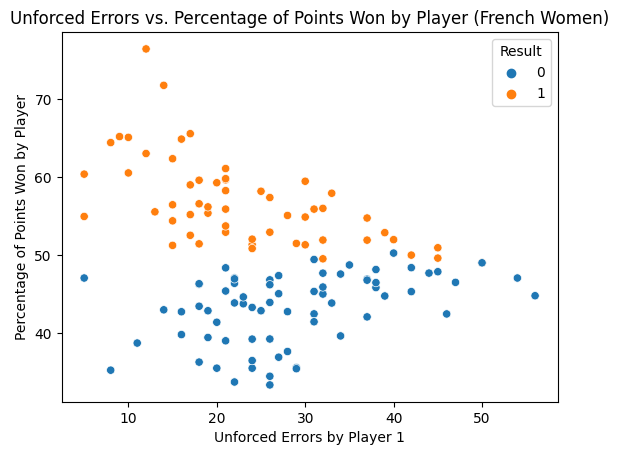

In [14]:
import seaborn as sns
df=french_women
df['PctPointsWon.1'] = (df['TPW.1'] / (df['TPW.1'] + df['TPW.2']))*100
df['PctPointsWon.2'] = (df['TPW.2'] / (df['TPW.1'] + df['TPW.2']))*100

sns.scatterplot(data=df, x='UFE.1', y='PctPointsWon.1', hue='Result')
plt.title('Unforced Errors vs. Percentage of Points Won by Player (French Women)')
plt.xlabel('Unforced Errors by Player 1')
plt.ylabel('Percentage of Points Won by Player')
plt.show()

E.	The percentage of winners after losing the first set in Australian Women dataset

Text(0.5, 0, 'Number of Sets Won by Losing Player')

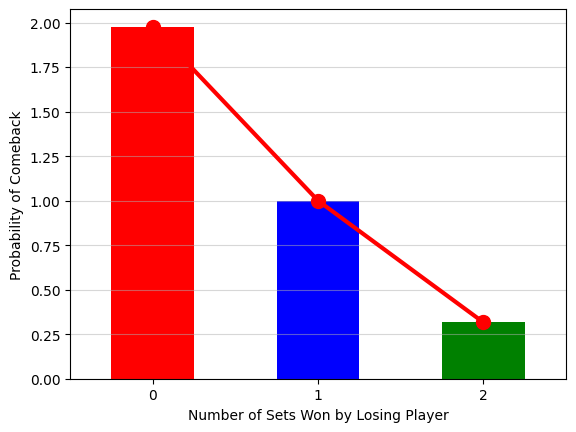

In [15]:
aus_women['Player1Win'] = aus_women['Result'].astype(str).apply(lambda x: x==1)
aus_women['Player1FirstSetWin'] = aus_women['FNL1'] > aus_women['FNL2']
aus_women['LosingPlayerWonSet'] = (aus_women['FNL1'] > aus_women['FNL2']) & (aus_women['FNL2'] > 0) | (aus_women['FNL2'] > aus_women['FNL1']) & (aus_women['FNL1'] > 0)

aus_women['ComebackSet'] = 0
aus_women.loc[(aus_women['Player1Win'] == False) & (aus_women['LosingPlayerWonSet'] == True), 'ComebackSet'] = aus_women.loc[(aus_women['Player1Win'] == False) & (aus_women['LosingPlayerWonSet'] == True), 'FNL2'].astype(int)

comeback_prob = aus_women.groupby('ComebackSet').size() / aus_women.groupby('FNL2').size()
comeback_prob.plot(kind='bar', x='Number of Sets Won by Losing Player', y='Probability of Comeback',color=["red","blue","green"])
comeback_prob.plot(x='Number of Sets Won by Losing Player', y='Probability of Comeback',color='red',linewidth=3,marker='o',linestyle='-',markersize=10)

plt.grid(axis='y', alpha=0.5)

plt.ylabel('Probability of Comeback')
plt.xlabel('Number of Sets Won by Losing Player')


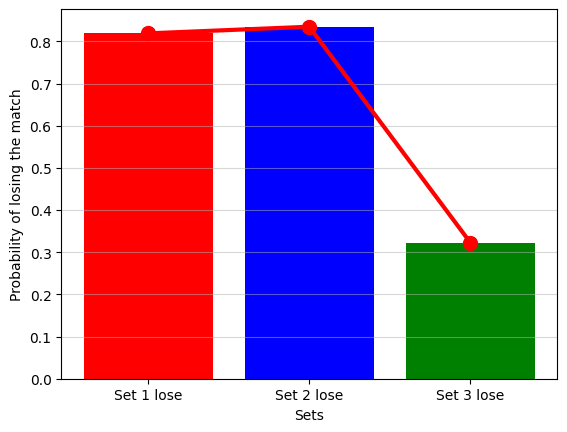

In [18]:
df=aus_women
def prob_losing(set_1,set_2,df):
    df1=df[df['Result']==0]
    df1_=df1[df1[set_1]<df1[set_2]]
    df2=df[df['Result']==1]
    df2_=df2[df2[set_1]>df2[set_2]]
    prob_set=(len(df2_)+len(df1_))/(len(df1)+len(df2))
    return prob_set

probability1=prob_losing('ST1.1','ST1.2',df)
probability2=prob_losing('ST2.1','ST2.2',df)
probability3=prob_losing('ST3.1','ST3.2',df)


plt.plot(range(1,4),[probability1,probability2,probability3],color='red',linewidth=3,marker='o',linestyle='-',markersize=10)

bars=plt.bar(np.arange(1,4),[probability1,probability2,probability3], color=["red","blue","green"])
plt.xticks(ticks=np.arange(1,4),labels=['Set 1 lose','Set 2 lose','Set 3 lose'])
lst=list('/o*')

plt.ylabel('Probability of losing the match')
plt.xlabel('Sets')
# plt.show()
plt.grid(axis='y', alpha=0.5)


F.	Is there a significant difference in the number of games won by the players depending on whether they served first or second in each set?

C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\3949993462.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  game_diffs = game_diffs.append(aus_women['ST2.1'] - aus_women['ST2.2'])
C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\3949993462.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  game_diffs = game_diffs.append(aus_women['ST3.1'] - aus_women['ST3.2'])
C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\3949993462.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  game_diffs = game_diffs.append(aus_women['ST4.1'] - aus_women['ST4.2'])
C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\3949993462.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use p

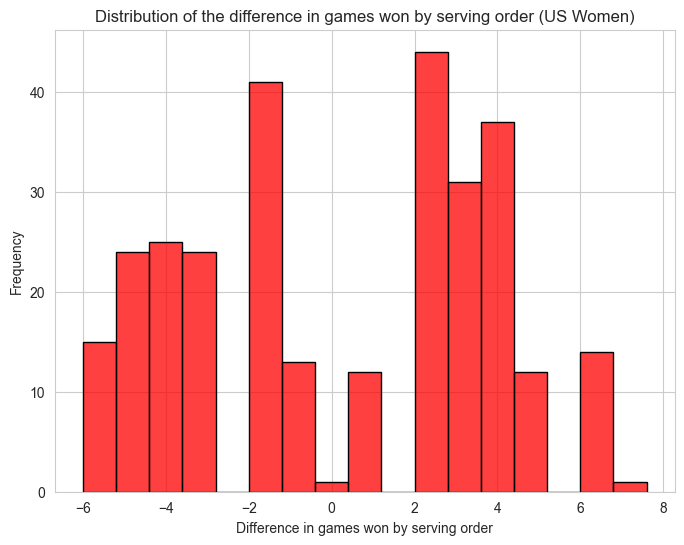

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

game_diffs = aus_women['ST1.1'] - aus_women['ST1.2']
game_diffs = game_diffs.append(aus_women['ST2.1'] - aus_women['ST2.2'])
game_diffs = game_diffs.append(aus_women['ST3.1'] - aus_women['ST3.2'])
game_diffs = game_diffs.append(aus_women['ST4.1'] - aus_women['ST4.2'])
game_diffs = game_diffs.append(aus_women['ST5.1'] - aus_women['ST5.2'])

# Set the style
sns.set_style('whitegrid')

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=game_diffs, bins=range(-10, 11), binwidth=0.8, color='red',edgecolor="black")
plt.xlabel('Difference in games won by serving order')
plt.ylabel('Frequency')
plt.title('Distribution of the difference in games won by serving order (US Women)')
plt.show()


G.	 What is the average number of aces per match for the top 10 players in the Wimbledon Women's Singles? 

The average number of aces per match for the top 10 players in the Wimbledon Women's Singles is: 2.29
The average number of aces per match for the top 5 seeded players is: 2.79
The average number of aces per match for the rest of the top 10 seeded players is: 2.70


C:\Users\omgup\AppData\Local\Temp\ipykernel_5740\775007982.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  player_aces = top_10_matches.groupby('Player1')['ACE.1'].mean().append(top_10_matches.groupby('Player2')['ACE.2'].mean())


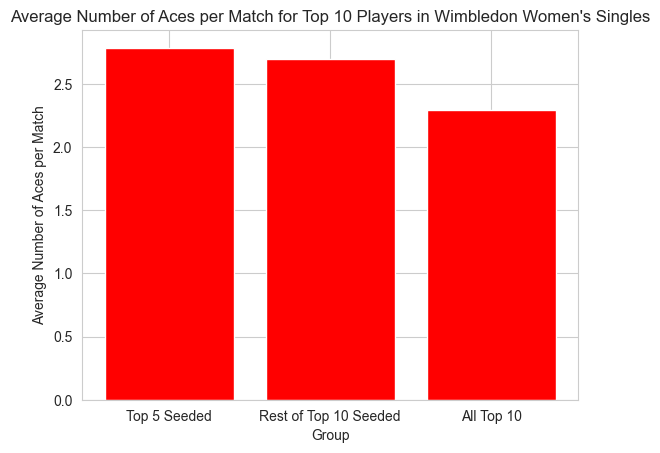

In [23]:
columns_of_interest = ['Player1', 'Player2', 'Result', 'ACE.1', 'ACE.2']
wimb_women = wimb_women[columns_of_interest]

player_counts = pd.concat([wimb_women['Player1'], wimb_women['Player2']]).value_counts()

top_10_players = player_counts[:10].index.tolist()

top_10_matches = wimb_women[(wimb_women['Player1'].isin(top_10_players)) & (wimb_women['Player2'].isin(top_10_players))]

player_aces = top_10_matches.groupby('Player1')['ACE.1'].mean().append(top_10_matches.groupby('Player2')['ACE.2'].mean())

avg_aces_top_10 = player_aces.mean()

top_5_seeded_players = player_counts[:5].index.tolist()
top_10_seeded_players = player_counts[:10].index.tolist()
top_5_aces = player_aces[top_5_seeded_players].mean()
rest_5_aces = player_aces[top_10_seeded_players][~player_aces.index.isin(top_5_seeded_players)].mean()

print(f"The average number of aces per match for the top 10 players in the Wimbledon Women's Singles is: {avg_aces_top_10:.2f}")
print(f"The average number of aces per match for the top 5 seeded players is: {top_5_aces:.2f}")
print(f"The average number of aces per match for the rest of the top 10 seeded players is: {rest_5_aces:.2f}")

fig, ax = plt.subplots()
ax.bar(['Top 5 Seeded', 'Rest of Top 10 Seeded', 'All Top 10'], [top_5_aces, rest_5_aces, avg_aces_top_10],color="red")
ax.set_xlabel('Group')
ax.set_ylabel('Average Number of Aces per Match')
ax.set_title('Average Number of Aces per Match for Top 10 Players in Wimbledon Women\'s Singles')
plt.show()


H.	What are the Average Number of Games Won per Set for French Open Men's Singles Winners and Non-winners?

Text(0.5, 1.0, 'Comparison of the average number of games won per set between winners and non-winners')

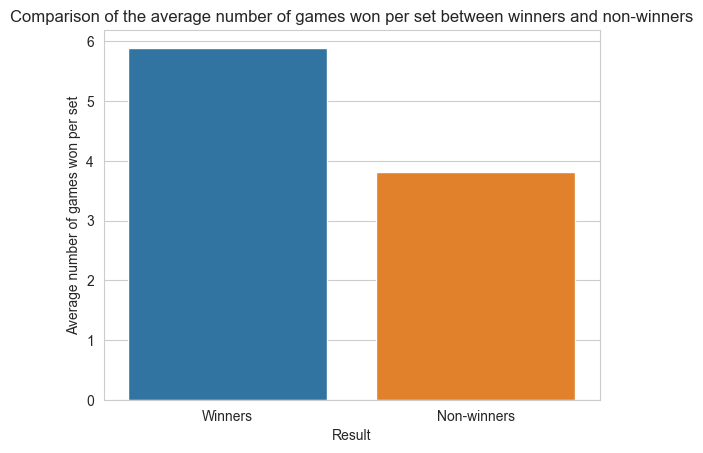

In [25]:

from scipy.stats import ttest_ind

winners = french_men[french_men['Result'] == 1]
non_winners = french_men[french_men['Result'] == 0]

winners_avg_games = (winners['ST1.1'].mean() + winners['ST2.1'].mean() + winners['ST3.1'].mean() + 
                     winners['ST4.1'].mean() + winners['ST5.1'].mean()) / 5
non_winners_avg_games = (non_winners['ST1.1'].mean() + non_winners['ST2.1'].mean() + non_winners['ST3.1'].mean() + 
                         non_winners['ST4.1'].mean() + non_winners['ST5.1'].mean()) / 5

sns.barplot(x=['Winners', 'Non-winners'], y=[winners_avg_games, non_winners_avg_games])
plt.xlabel('Result')
plt.ylabel('Average number of games won per set')
plt.title('Comparison of the average number of games won per set between winners and non-winners')



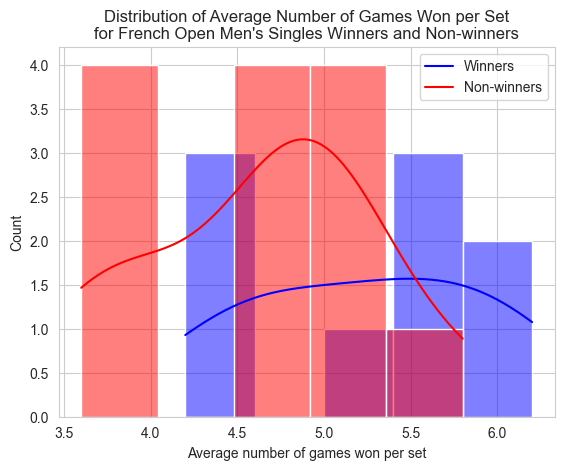

In [26]:
winners = french_men[french_men['Result'] == 1]
losers = french_men[french_men['Result'] == 0]
winners_games = (winners['ST1.1'] + winners['ST2.1'] + winners['ST3.1'] + winners['ST4.1'] + winners['ST5.1'])/5
losers_games = (losers['ST1.1'] + losers['ST2.1'] + losers['ST3.1'] + losers['ST4.1'] + losers['ST5.1'])/5
sns.histplot(data=winners_games, color='blue', alpha=0.5, kde=True)
sns.histplot(data=losers_games, color='red', alpha=0.5, kde=True)

plt.xlabel('Average number of games won per set')
plt.ylabel('Count')
plt.title('Distribution of Average Number of Games Won per Set\nfor French Open Men\'s Singles Winners and Non-winners')
plt.legend(['Winners', 'Non-winners'])

